In [1]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == '06').all()

In [5]:
#  3. Convert the June temperatures to a list.
june_temp = list(np.ravel(june_temp))

In [6]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temp_df = pd.DataFrame(june_temp, columns=['Temp'])

In [7]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temp_df.describe()

,Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [8]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temp = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == '12').all()

In [9]:
# 7. Convert the December temperatures to a list.
dec_temp = list(np.ravel(dec_temp))

In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temp_df = pd.DataFrame(dec_temp, columns=['Temp'])

In [11]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temp_df.describe()

,Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


## D3: Graphs for analysis for ReadMe MD file

In [12]:
# Import the dependencies. 
import matplotlib.pyplot as plt
%matplotlib inline

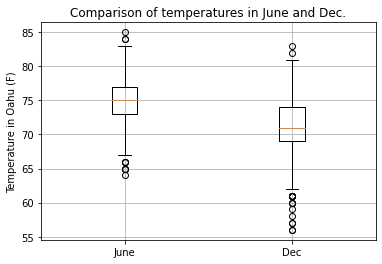

<Figure size 432x288 with 0 Axes>

In [13]:
# Make box plots of June and December to compare their summary statistics. 
june = june_temp_df['Temp']
dec = dec_temp_df['Temp']
fig, ax = plt.subplots()
ax.boxplot([june, dec], labels=['June', 'Dec'])
ax.set_title('Comparison of temperatures in June and Dec.')
ax.set_ylabel('Temperature in Oahu (F)')
ax.grid()
plt.show()
plt.tight_layout()

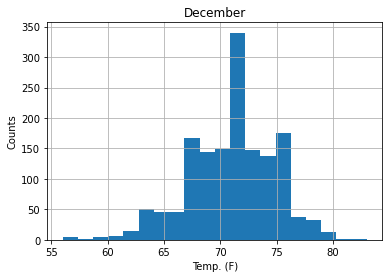

<Figure size 432x288 with 0 Axes>

In [14]:
# Plot the temperature observations for December. 
dec_temp_df.hist(bins=20)
plt.xlabel('Temp. (F)')
plt.ylabel('Counts')
plt.title('December')
plt.show()
plt.tight_layout()

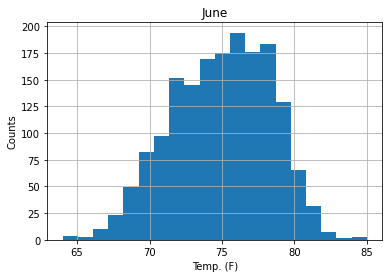

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the temperature observations for June. 
june_temp_df.hist(bins=20)
plt.xlabel('Temp. (F)')
plt.ylabel('Counts')
plt.title('June')
plt.show()
plt.tight_layout()

In [16]:
# Get the number of counts for temperatures above 70F in December. 
dec_count = session.query(func.count(Measurement.tobs).filter(extract('month', Measurement.date) == '12').filter(Measurement.tobs >= 70.0)).all()
print(dec_count)

[(1036,)]


In [17]:
# Get the number of coutns for temperatures above 60F in June. 
june_count = session.query(func.count(Measurement.tobs).filter(extract('month', Measurement.date) == '06').filter(Measurement.tobs >= 70.0)).all()
print(june_count)

[(1611,)]
